In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme()
pd.options.mode.chained_assignment = None

In [4]:
def get_graphs_i_need(file_name: str):
    df = pd.read_csv(file_name)

    # get pearson correlation coefficient

    df_deers = df[df['species'] == "Deer"]
    df_grass = df[df['species'] == "Grass"]

    print(f"R = {np.corrcoef(df_deers['population'], df_grass['population'])[0][1]}")

    data_count = max(df[df["species"] == "Deer"]["time"])
    
    # plotting deer/grass population
    plt.figure(figsize=(20, 7))
    plt.title("Populations against Time")

    g = sns.lineplot(data=df[(df['species'] == "Deer") | (df['species'] == "Grass")], x="time", y="population", hue="species", palette=["g", "b"], linewidth=2) # plot the populations against time

    average_deer_population = np.average(df[(df['species'] == "Deer")]["population"])
    print(f"Average deer population: {average_deer_population}")
    plt.plot([0, data_count], [average_deer_population, average_deer_population], "b--", linewidth=1, label="Average Deer Population")

    average_grass_population = np.average(df[(df['species'] == "Grass")]["population"])
    print(f"Average grass population: {average_grass_population}")
    plt.plot([0, data_count], [average_grass_population, average_grass_population], "g--", linewidth=1, label="Average Grass Population")

    plt.legend()

    g.set(xlabel="Time", ylabel="Population")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    # traits of deer over time
    plt.figure(figsize=(20, 7))
    plt.title("Speed/Size against Time")
    g = sns.lineplot(data=df_deers, x="time", y="speed", linewidth=2, label="Speed")
    g = sns.lineplot(data=df_deers, x="time", y="size", linewidth=2, label="Size")
    g.set(xlabel="Time", ylabel="Speed/Size")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    average_deer_speed = np.average(df_deers["speed"])
    average_deer_size = np.average(df_deers["size"])

    print(f"Average deer speed: {average_deer_speed}")
    print(f"Average deer size: {average_deer_size}")

    # Rolling averages are useful for finding long-term trends otherwise disguised by occasional fluctuations. For instance, if your company sells ice, you might notice a fluctuation upwards on hot days
    # https://www.indeed.com/career-advice/career-development/what-is-rolling-average#:~:text=Rolling%20averages%20are%20useful%20for,might%20become%20difficult%20to%20track.

    window_size = 100

    df_deers["birthsSmoothed"] = df_deers["births"].rolling(window_size).mean()
    df_deers["deathsTotalSmoothed"] = df_deers["deathsTotal"].rolling(window_size).mean()
    df_deers["deathsByAgeSmoothed"] = df_deers["deathsByAge"].rolling(window_size).mean()
    df_deers["deathsByThirstSmoothed"] = df_deers["deathsByThirst"].rolling(window_size).mean()
    df_deers["deathsByHungerSmoothed"] = df_deers["deathsByHunger"].rolling(window_size).mean()

    plt.figure(figsize=(20, 7))
    plt.title("Births/Deaths against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2)
    g = sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths", linewidth=2)
    g.set(xlabel="Time", ylabel="Births/Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Births/Deaths by cause against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2, color=sns.color_palette()[0])
    sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths Total", linewidth=2, color=sns.color_palette()[1])
    sns.lineplot(data=df_deers, x="time", y="deathsByAgeSmoothed", label="Deaths by age", linewidth=2, color=sns.color_palette()[2])
    sns.lineplot(data=df_deers, x="time", y="deathsByThirstSmoothed", label="Deaths by thirst", linewidth=2, color=sns.color_palette()[3])
    g = sns.lineplot(data=df_deers, x="time", y="deathsByHungerSmoothed", label="Deaths by hunger", linewidth=2, color=sns.color_palette()[5])

    g.set(xlabel="Time", ylabel="Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Overall population growth against Time")
    df_deers["netPopulationChange"] = df_deers["births"] - df_deers["deathsTotal"]
    df_deers["netPopulationChangeSmoothed"] = df_deers["netPopulationChange"].rolling(window_size).mean()

    g = sns.lineplot(data=df_deers, x="time", y="netPopulationChangeSmoothed", linewidth=2)
    plt.axhline(y=0, xmin=0, xmax=data_count, color="b", linestyle="--", linewidth=1)
    g.set(xlabel="Time", ylabel="Net Population Change")
    g.axes.set_xlim(0)

R = -0.07123722329758618
Average deer population: 1065.9509658246657
Average grass population: 71.83506686478455
Average deer speed: 0.5200709303120357
Average deer size: 1.6145225599554236


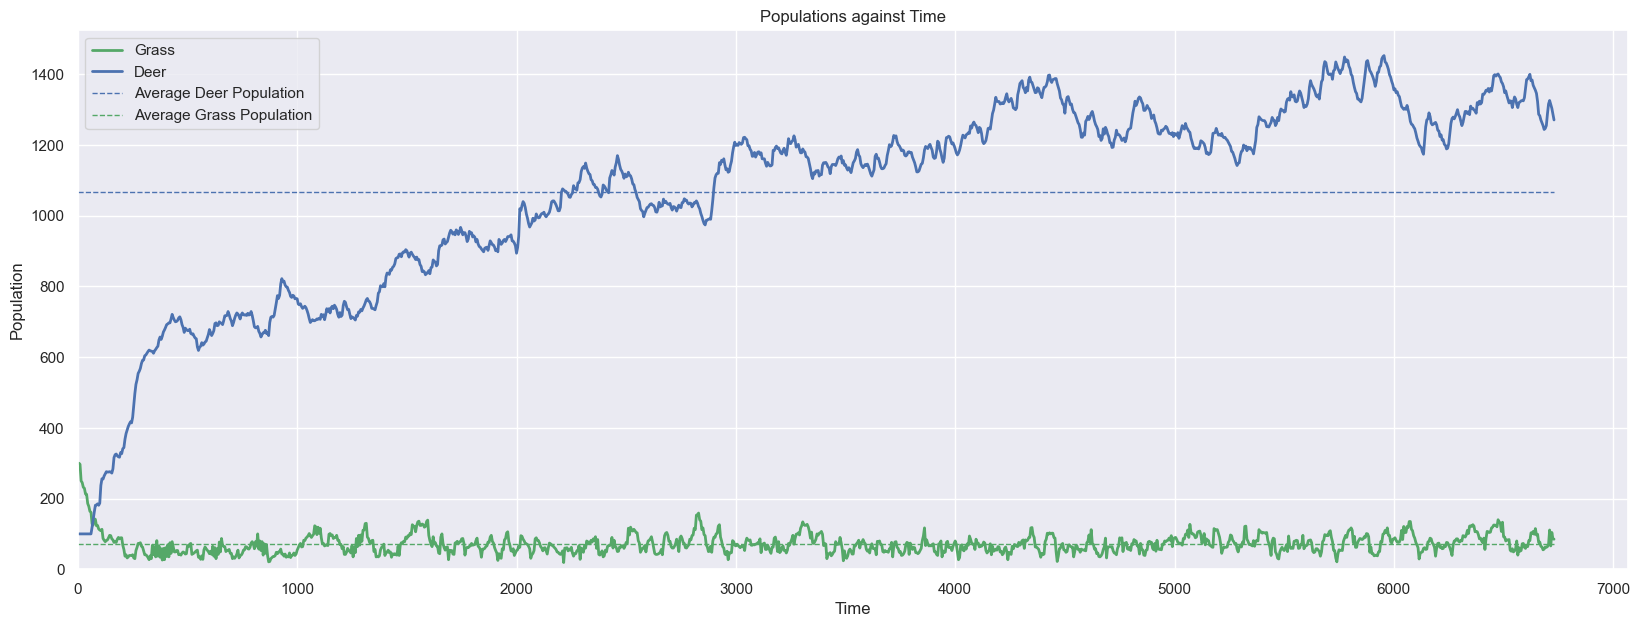

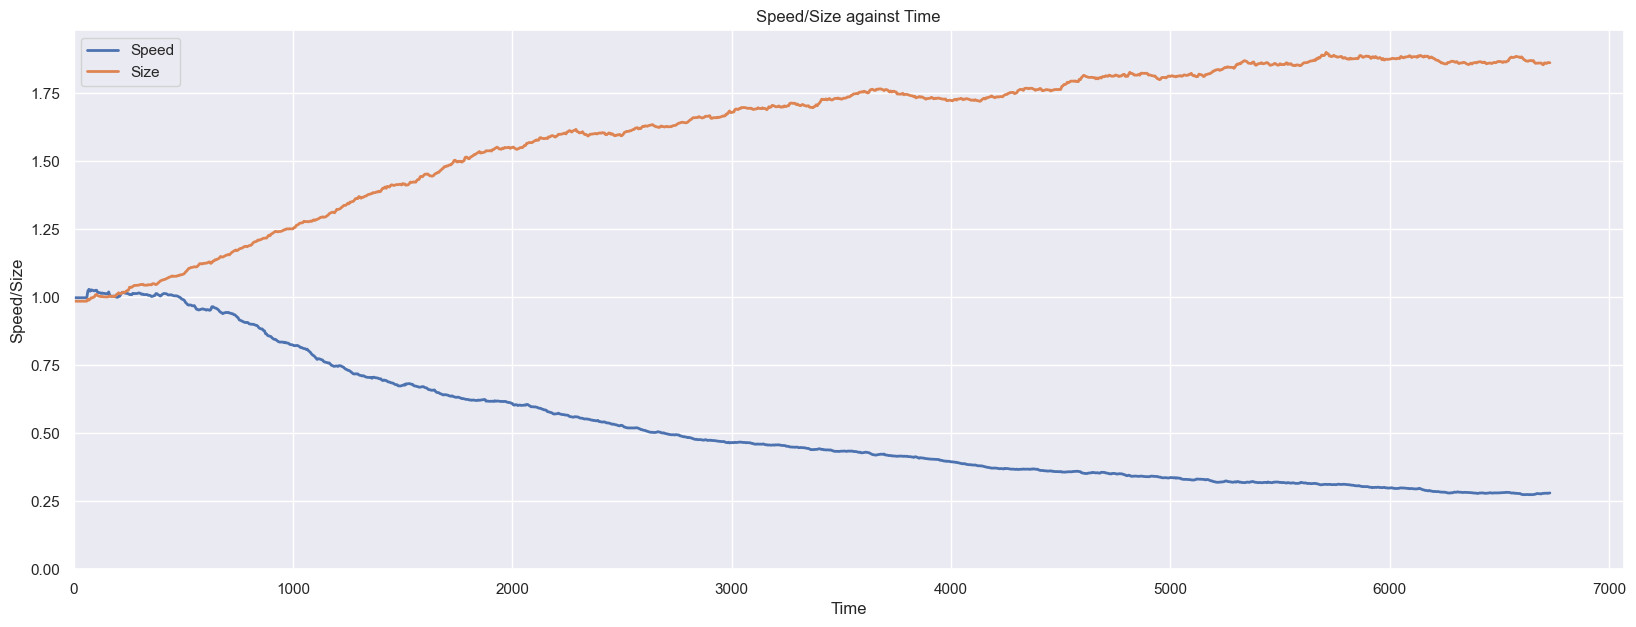

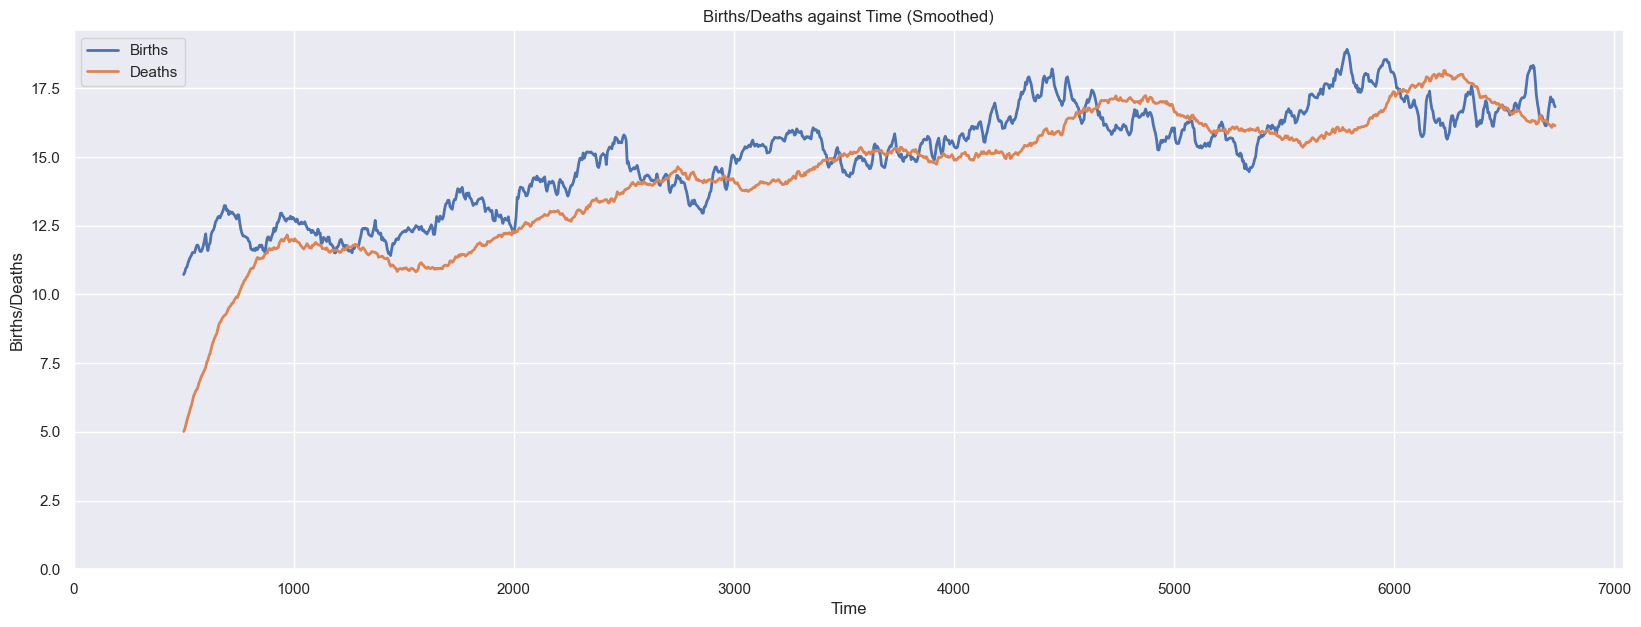

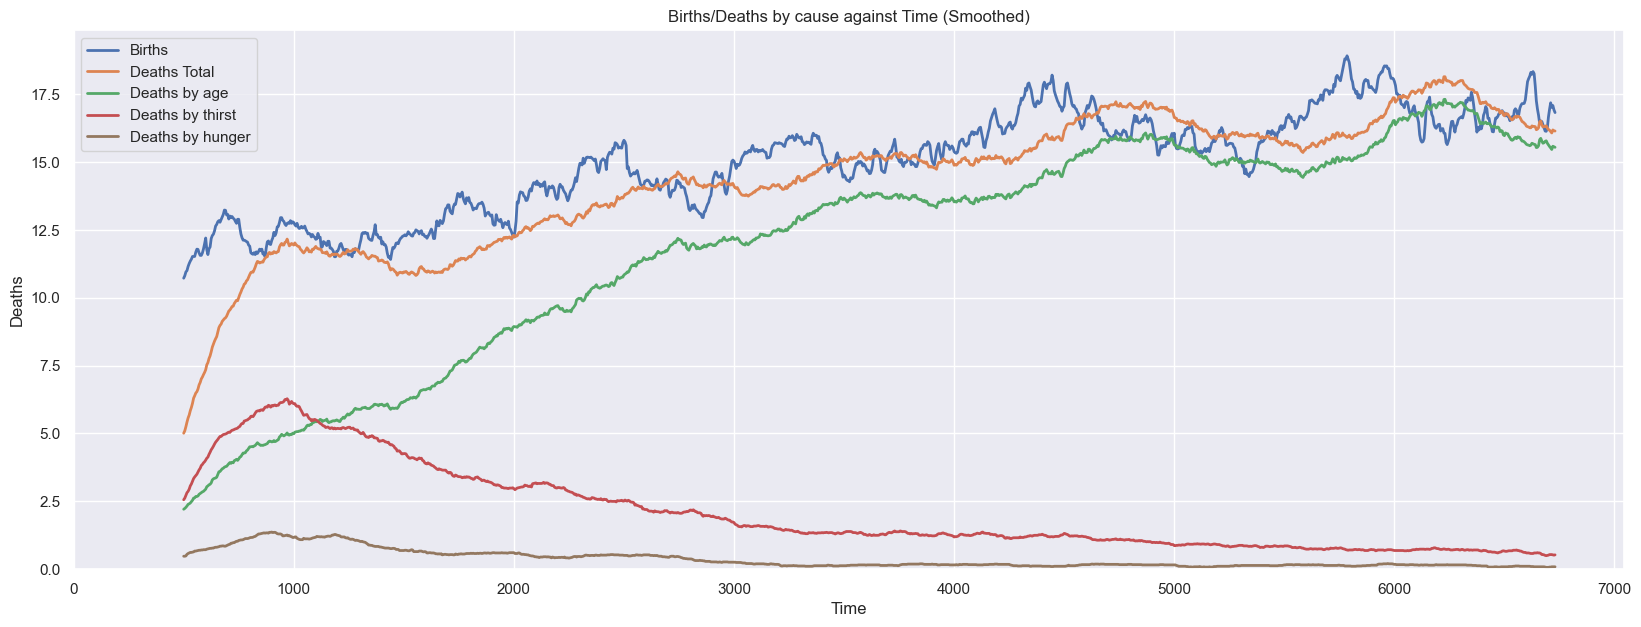

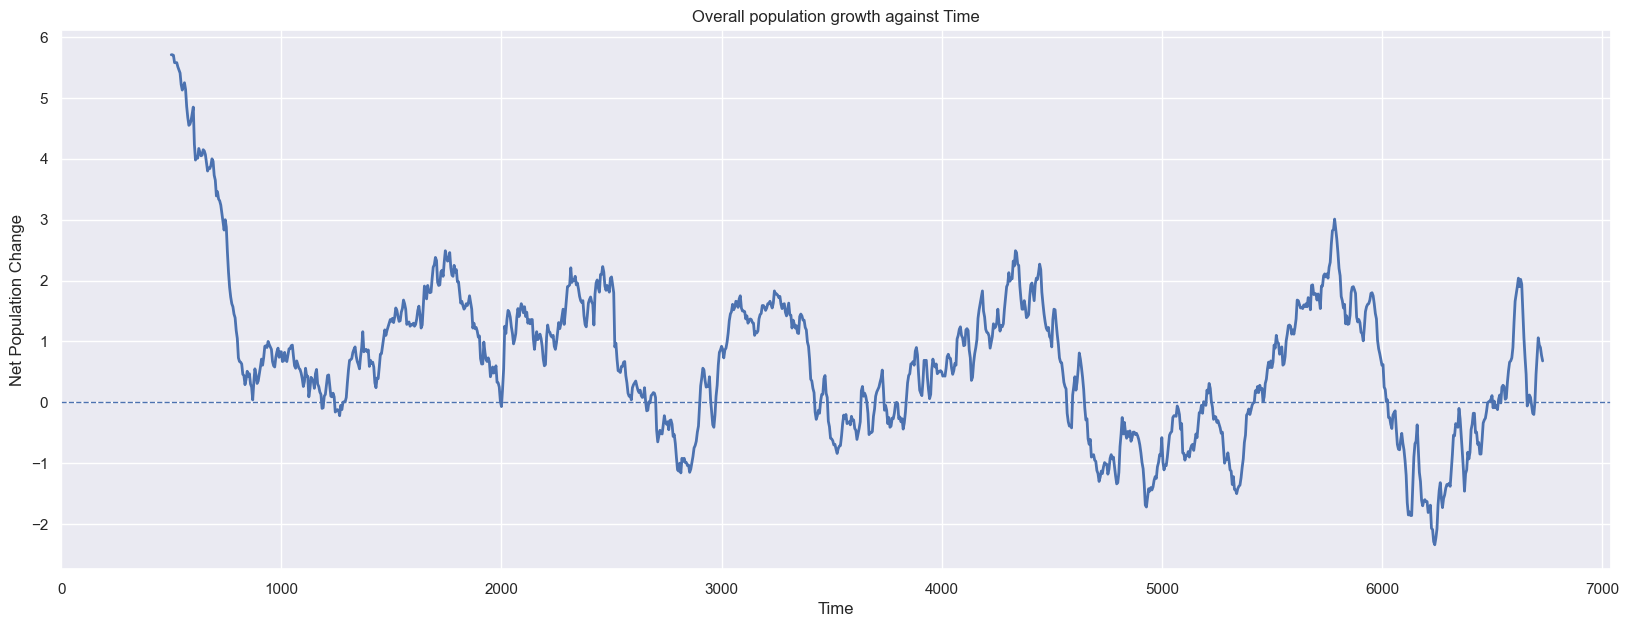

In [7]:
get_graphs_i_need("data/environment-size/size-64.csv")

R = -0.07982756140478647
Average deer population: 224.34966592427617
Average grass population: 212.83964365256125
Average deer speed: 1.100088817817372
Average deer size: 1.5135537787676319


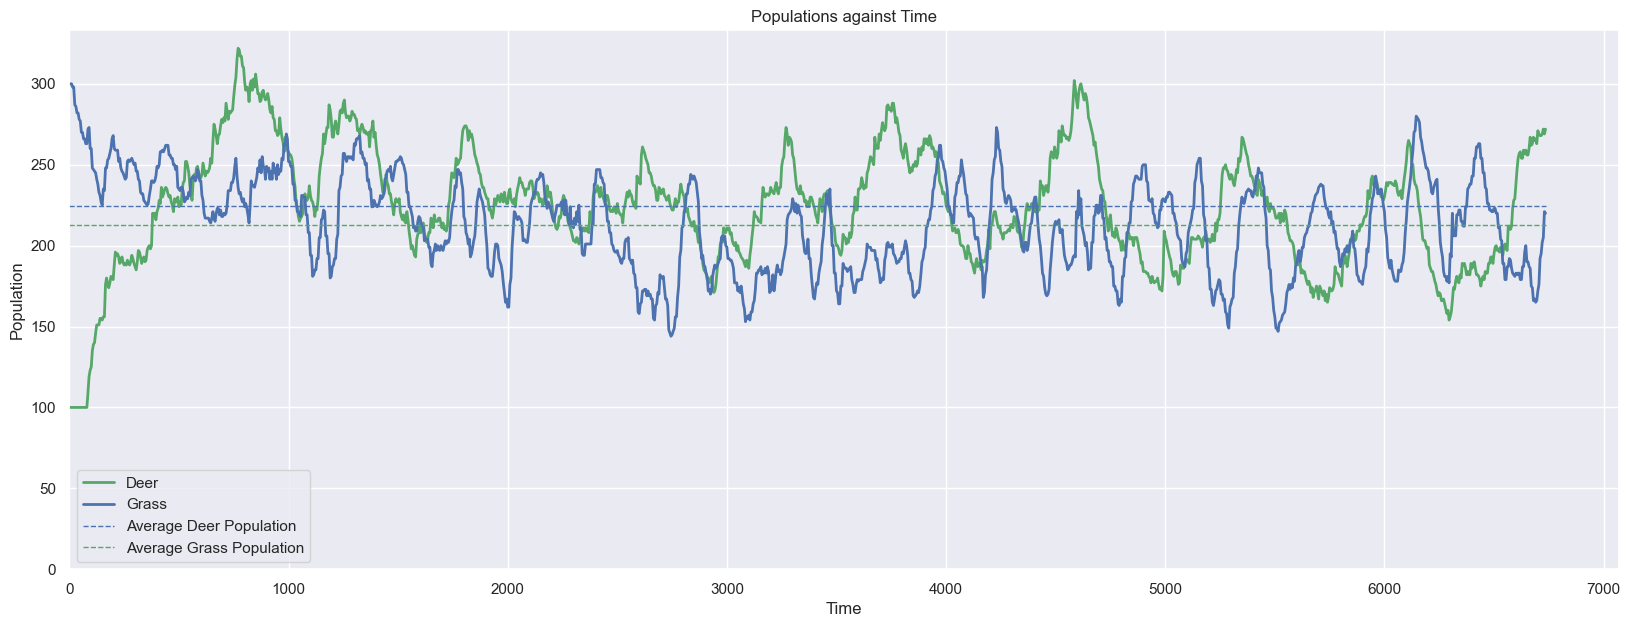

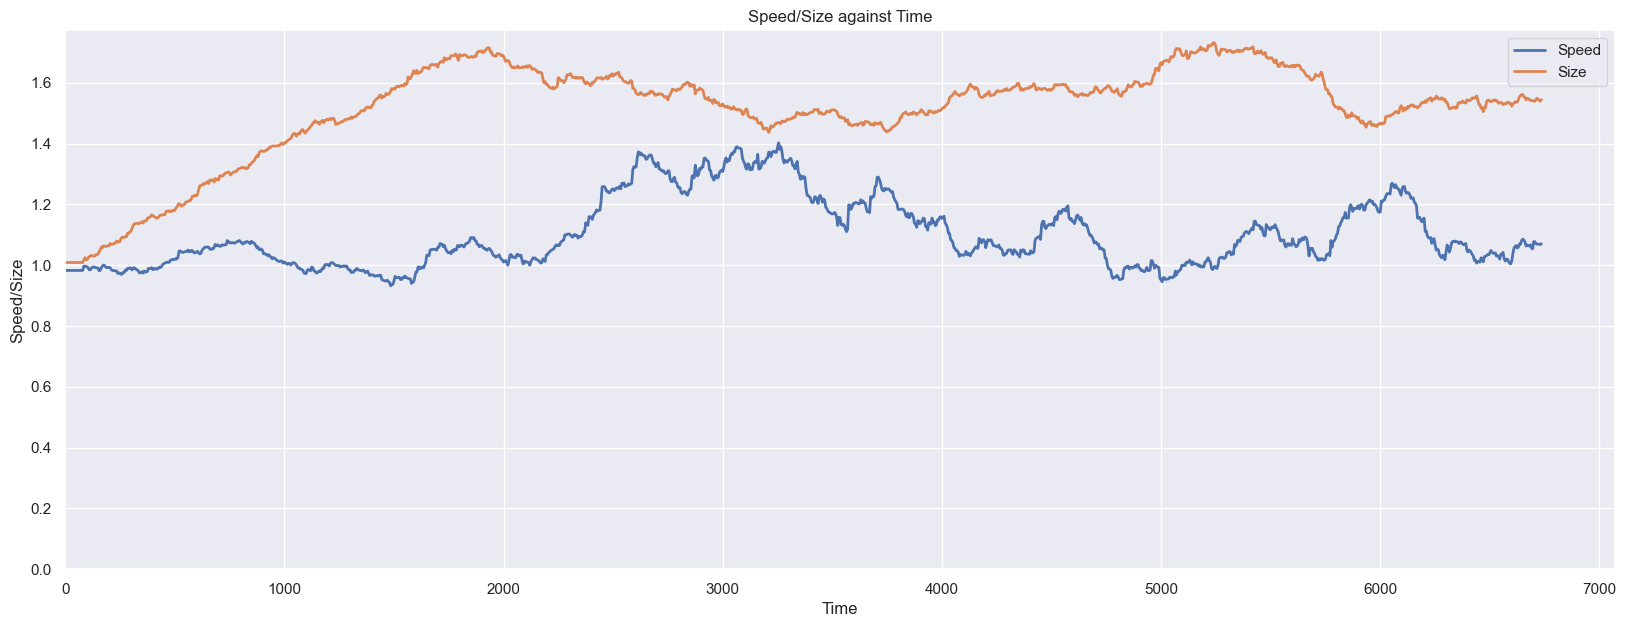

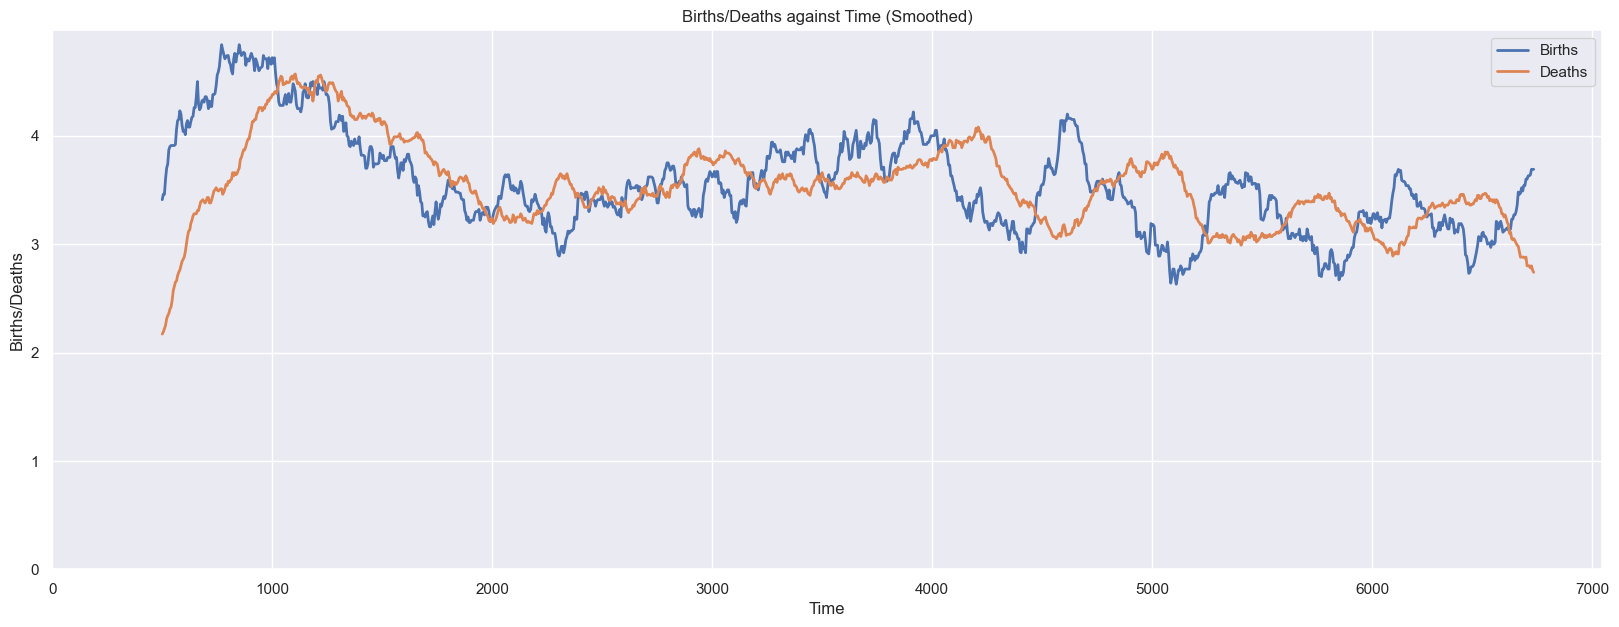

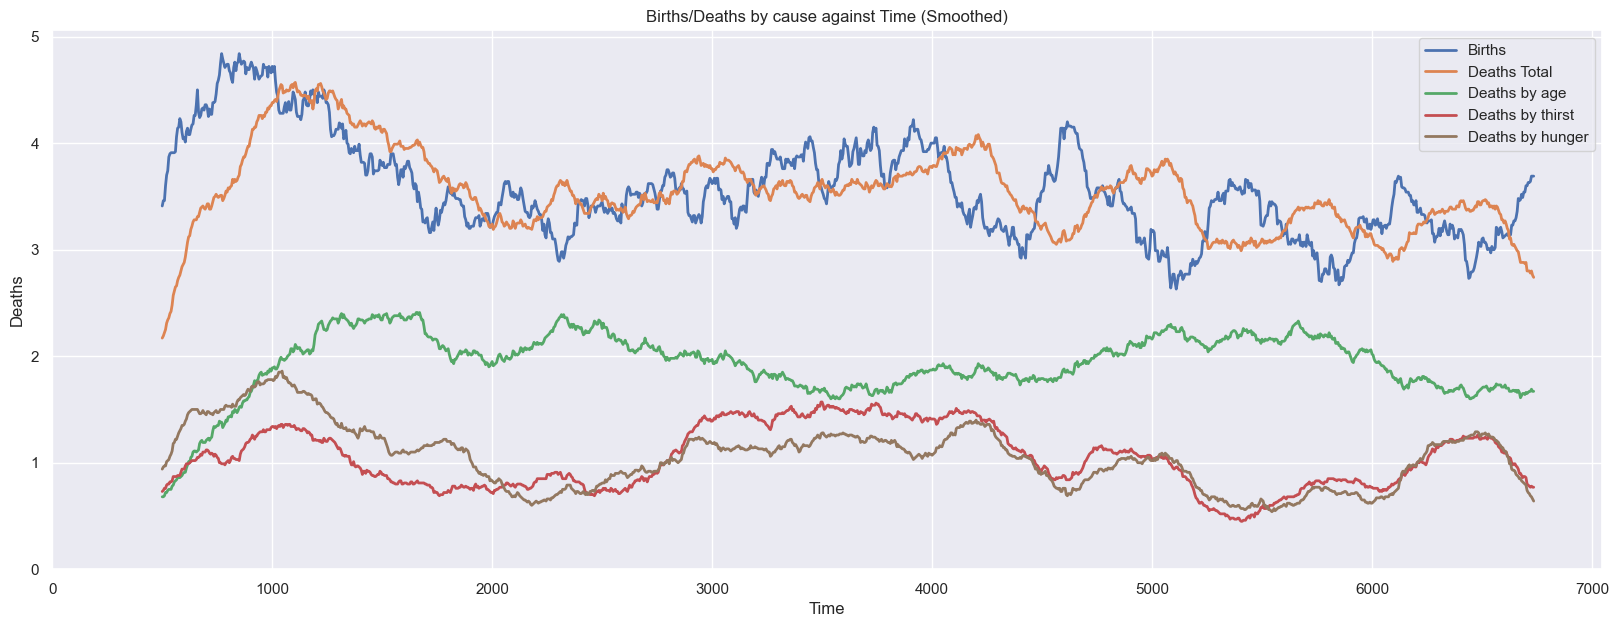

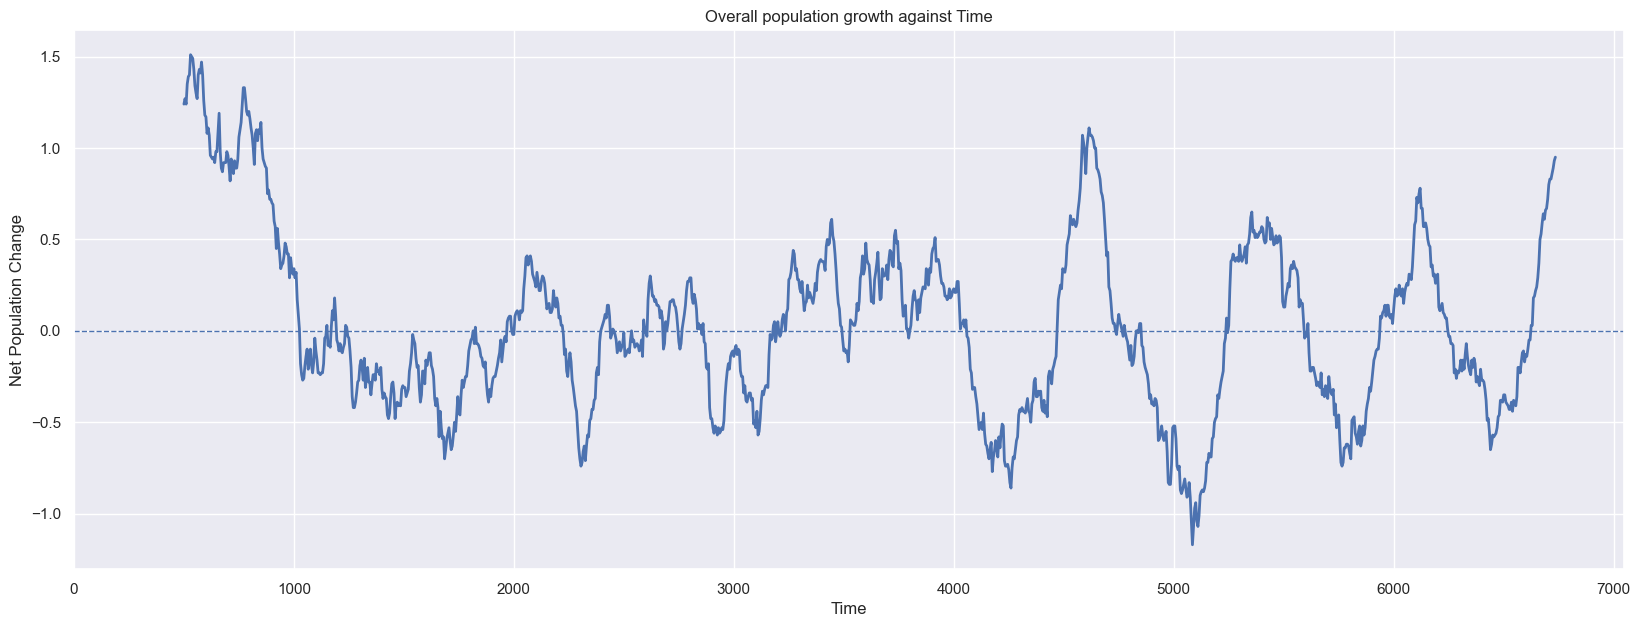

In [6]:
get_graphs_i_need("data/environment-size/size-127.csv")

R = -0.486362349676244
Average deer population: 321.5969696969697
Average grass population: 259.3159090909091
Average deer speed: 0.874424276060606
Average deer size: 1.4030453309848485


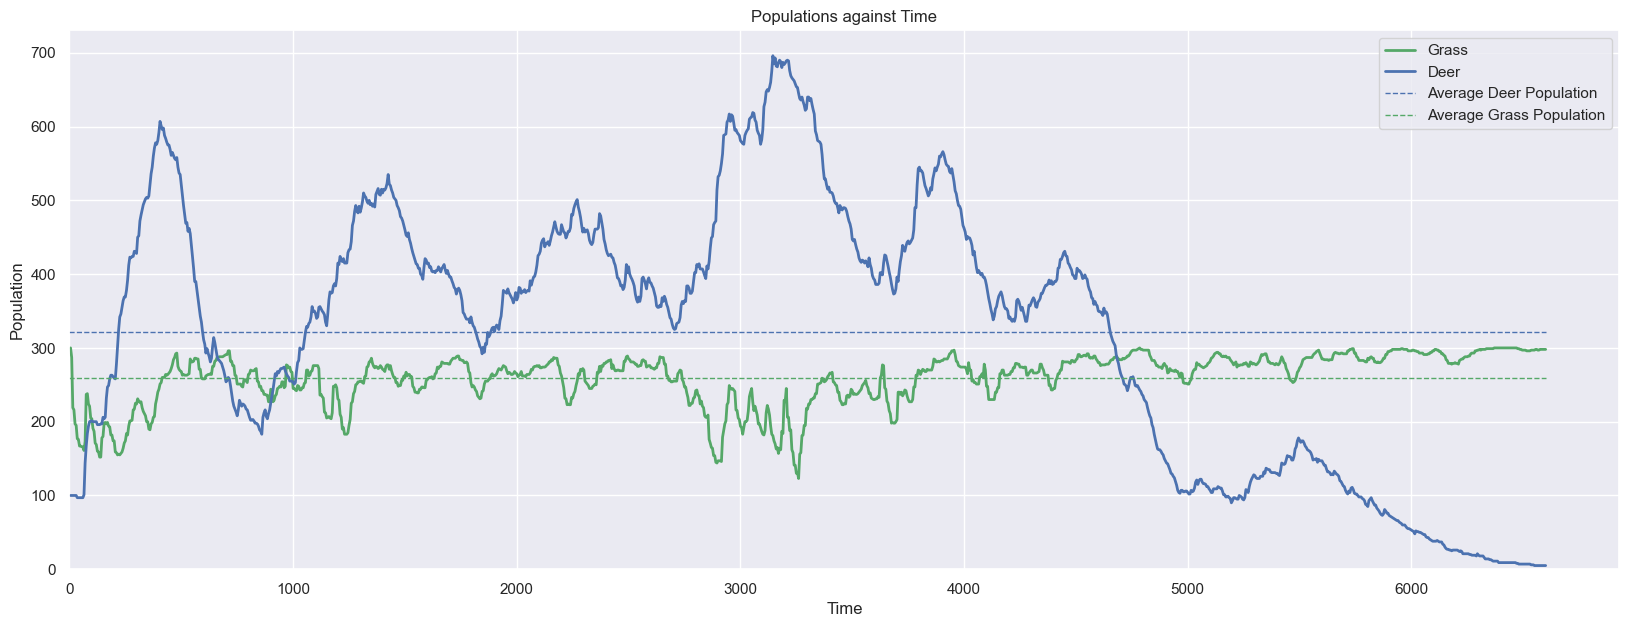

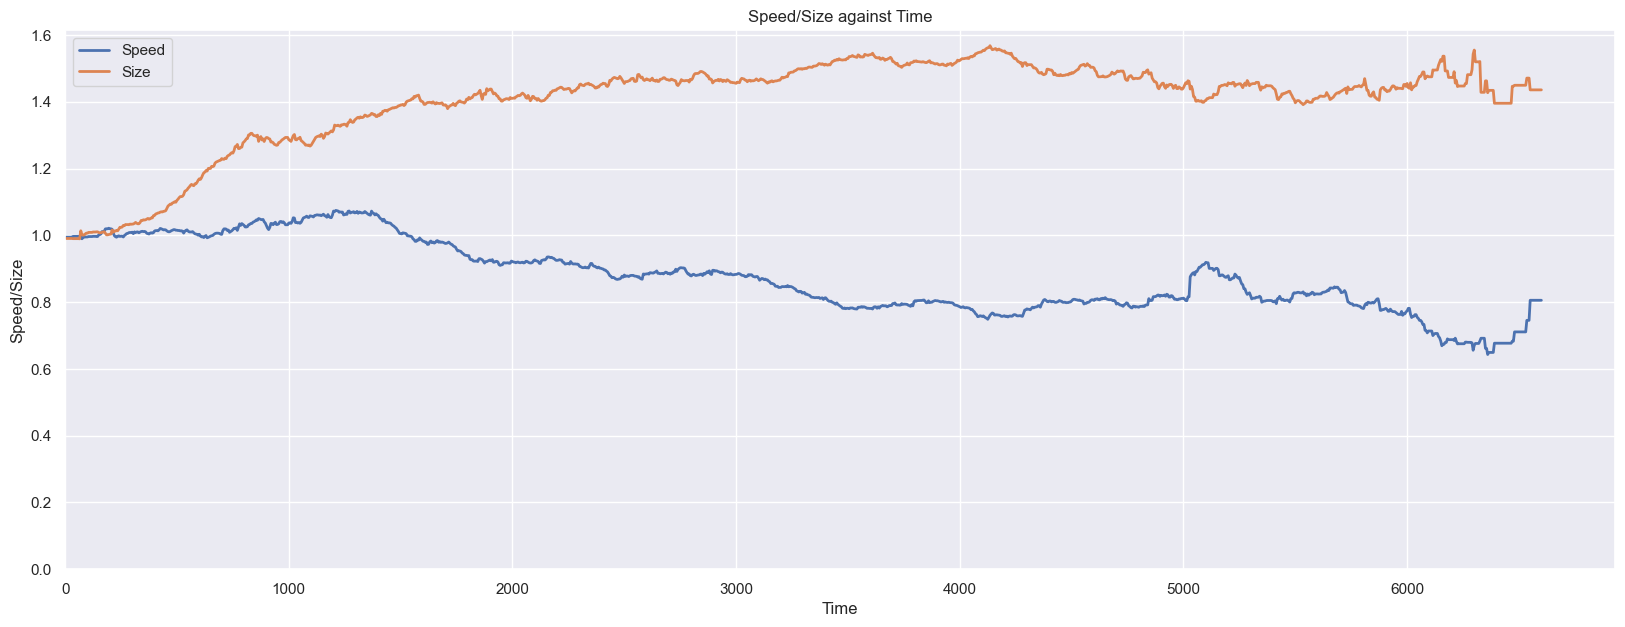

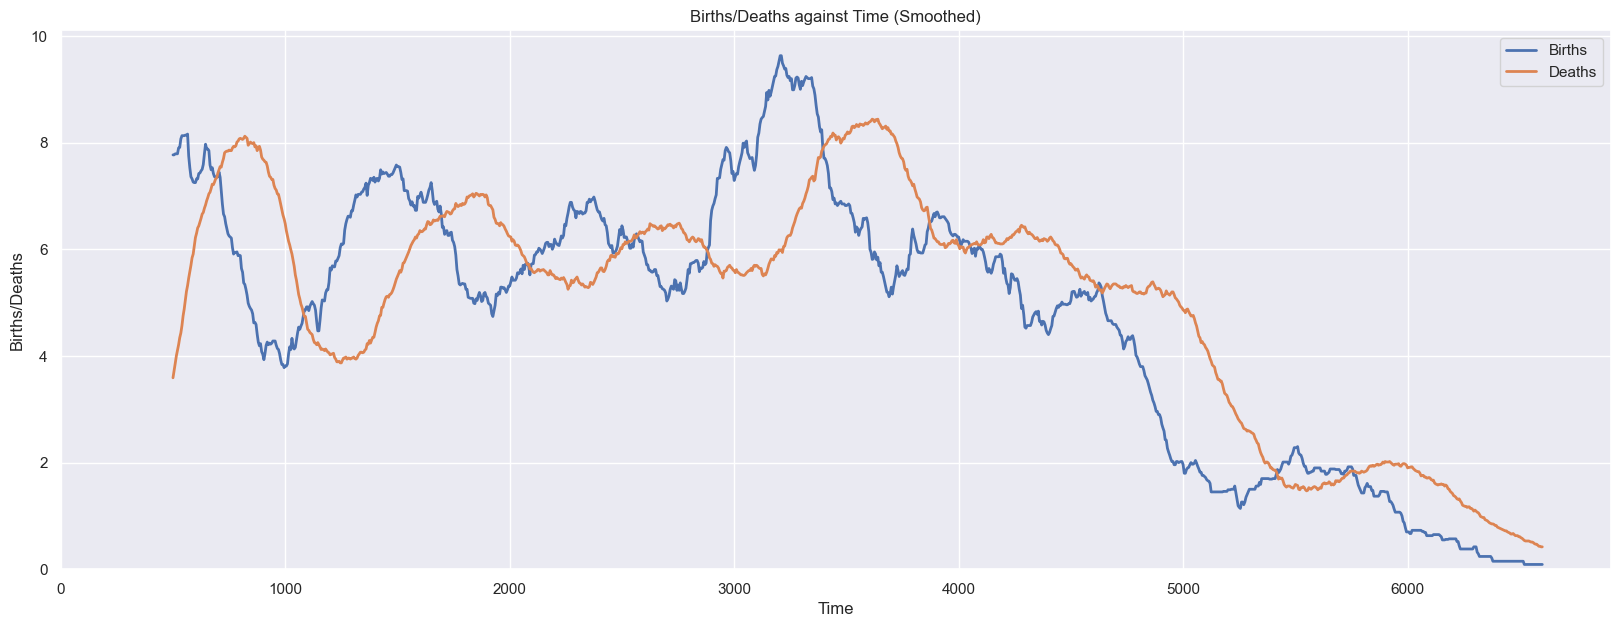

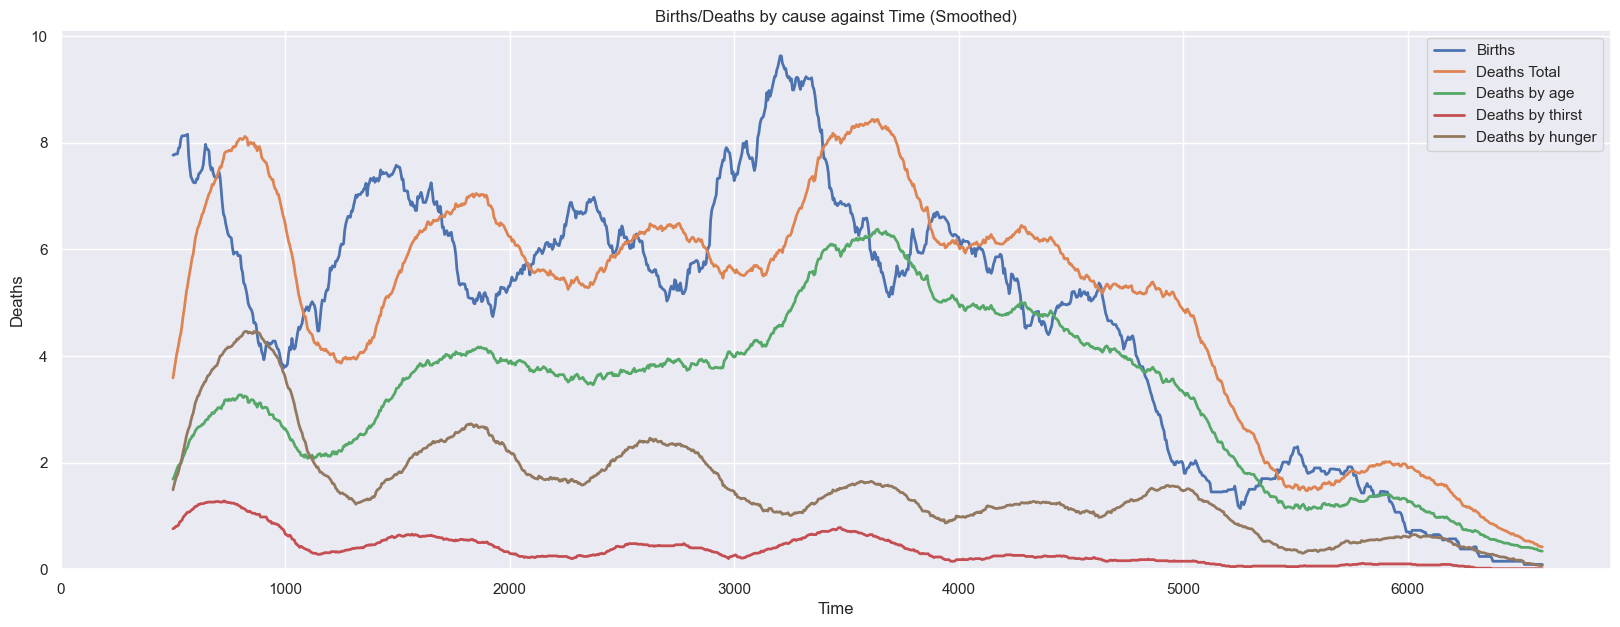

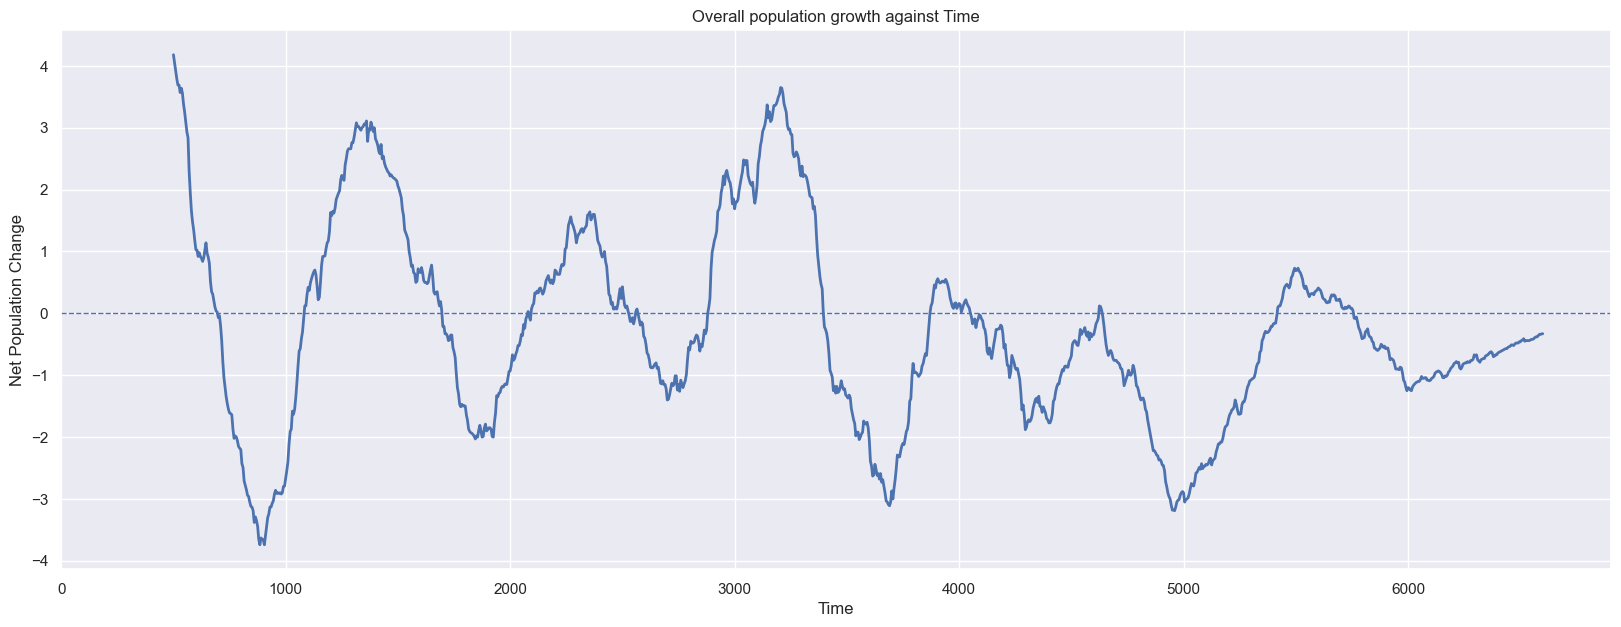

In [8]:
get_graphs_i_need("data/environment-size/size-191.csv")

R = -0.48731087876807444
Average deer population: 104.1744719926538
Average grass population: 273.6253443526171
Average deer speed: 0.9536665755739211
Average deer size: 1.4759019944903582


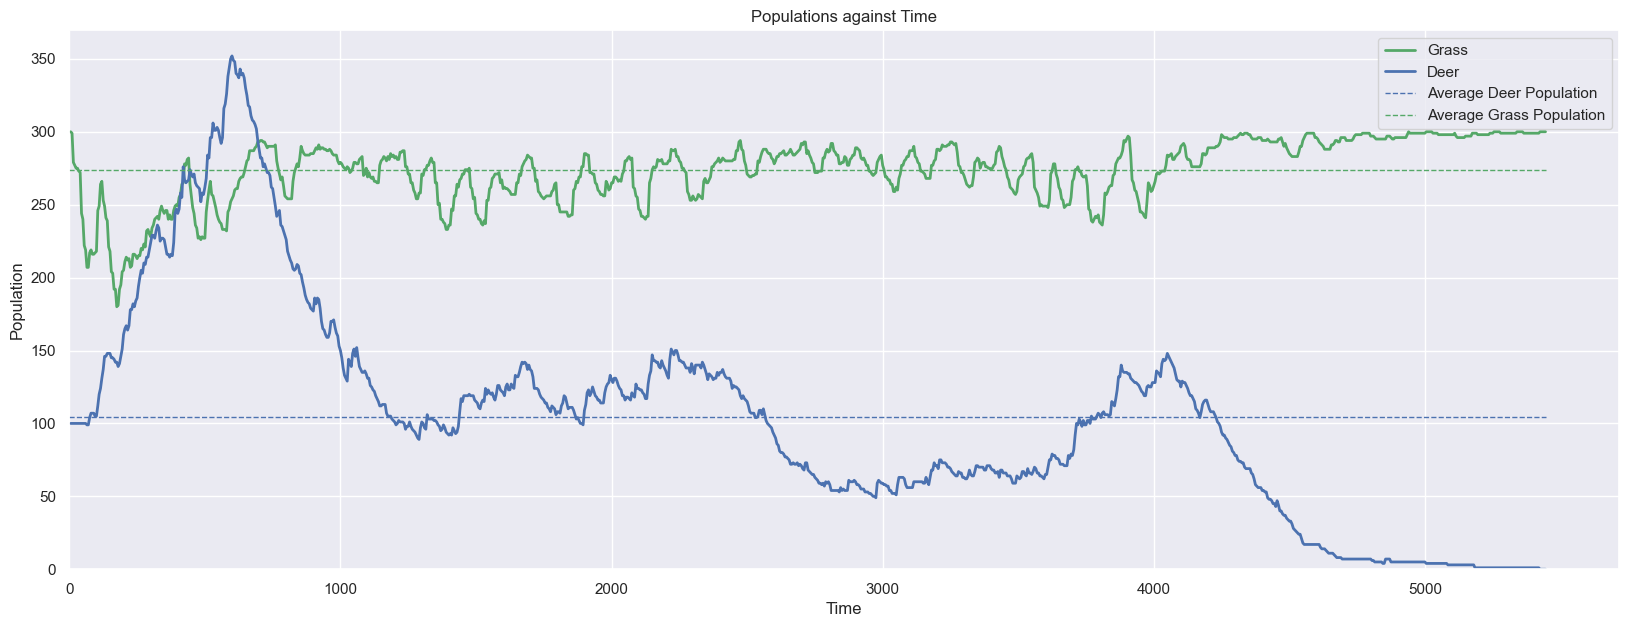

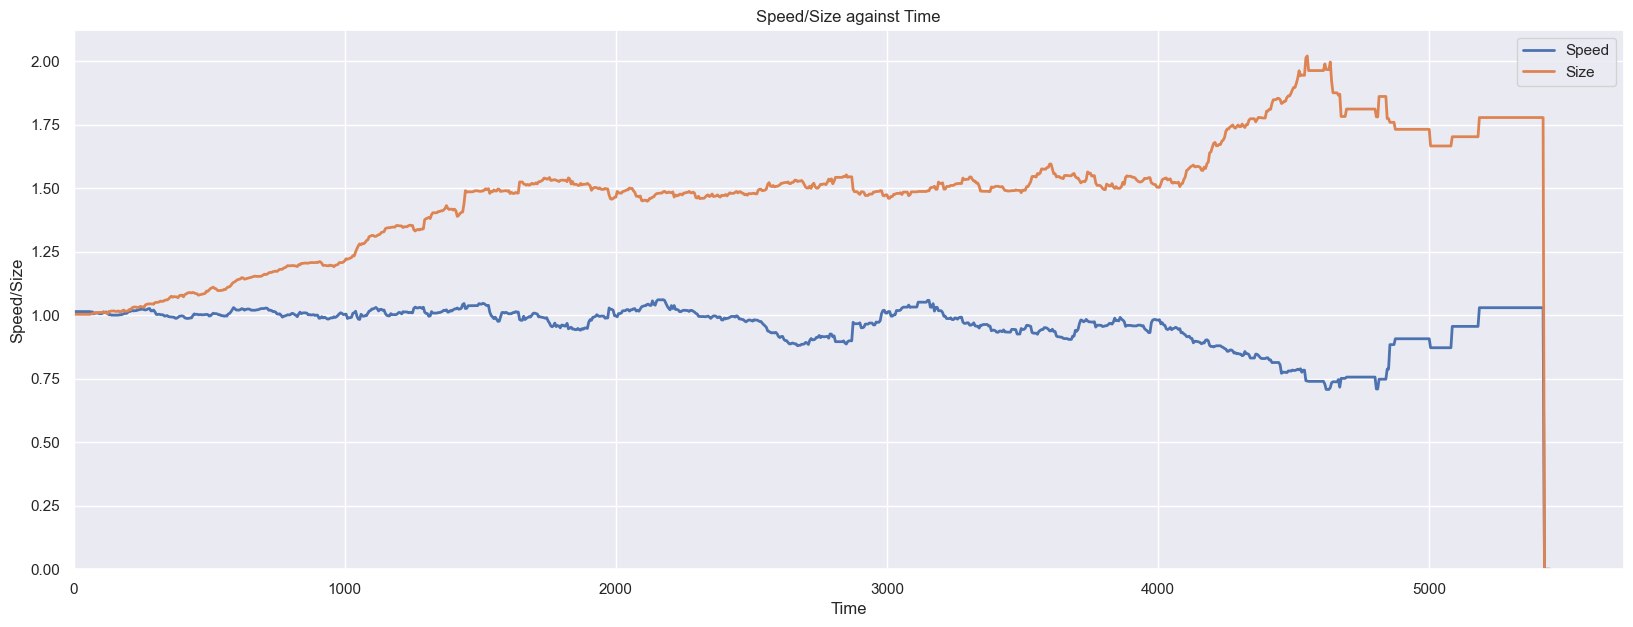

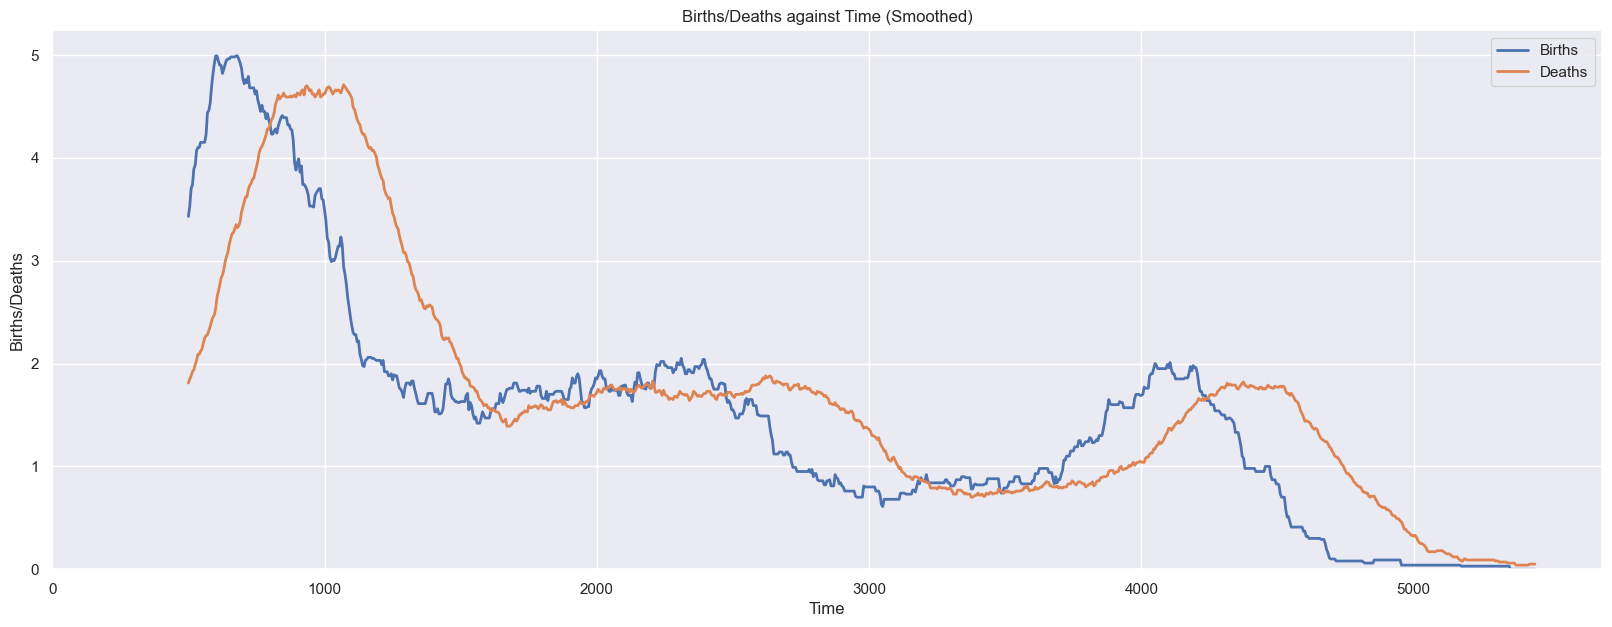

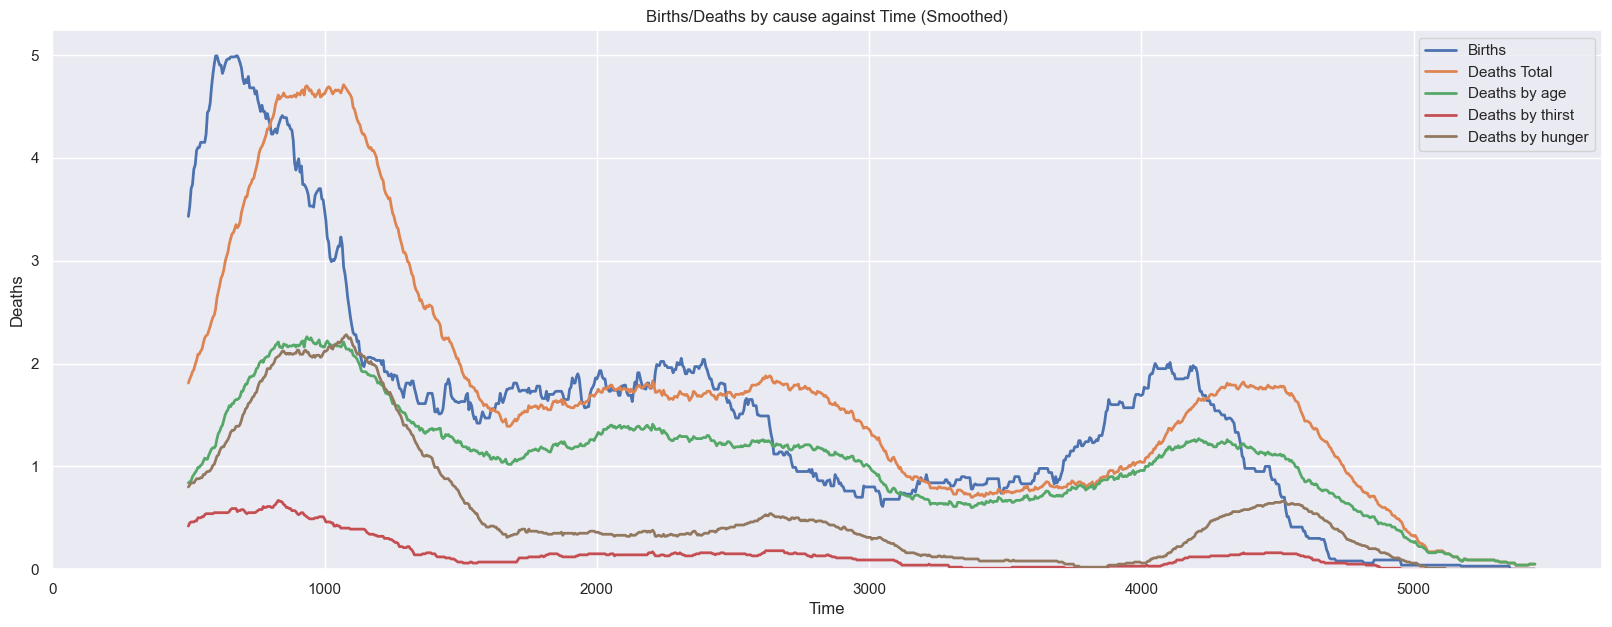

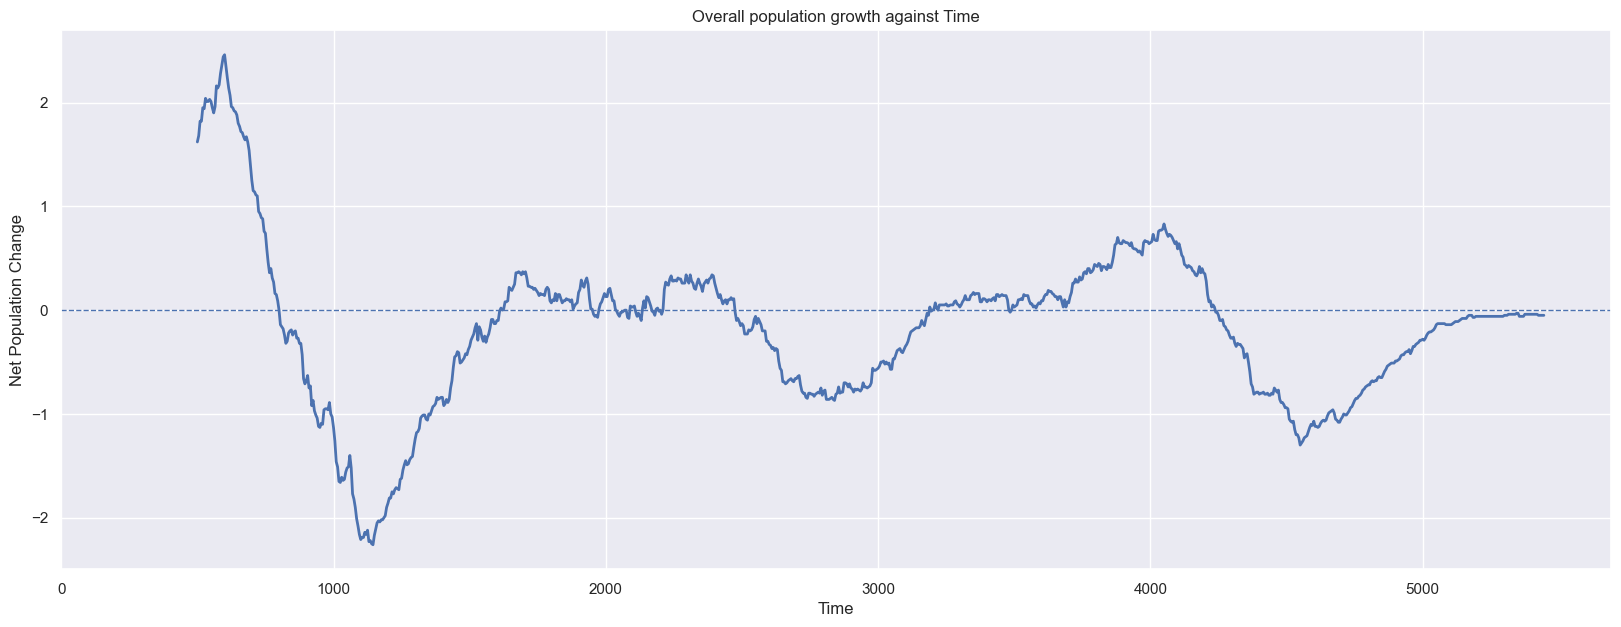

In [5]:
get_graphs_i_need("data/environment-size/size-255.csv")

In [9]:
window_size = 25

df_64 = pd.read_csv("data/environment-size/size-64.csv")
df_64 = df_64[df_64["time"] <= 6000]
df_64["deer_starting_population"] = 100
df_64["deathsByHungerSmoothed"] = df_64["deathsByHunger"].rolling(window_size).mean()

df_127 = pd.read_csv("data/environment-size/size-127.csv")
df_127 = df_127[df_127["time"] <= 6000]
df_127["deer_starting_population"] = 200
df_127["deathsByHungerSmoothed"] = df_127["deathsByHunger"].rolling(window_size).mean()

df_191 = pd.read_csv("data/environment-size/size-191.csv")
df_191 = df_191[df_191["time"] <= 6000]
df_191["deer_starting_population"] = 300
df_191["deathsByHungerSmoothed"] = df_191["deathsByHunger"].rolling(window_size).mean()

df_255 = pd.read_csv("data/environment-size/size-255.csv")
df_255 = df_255[df_255["time"] <= 6000]
df_255["deer_starting_population"] = 400
df_255["deathsByHungerSmoothed"] = df_255["deathsByHunger"].rolling(window_size).mean()

all_dfs = [df_64, df_127, df_191, df_255]
df_overall = pd.concat(all_dfs)

df_by_size = pd.DataFrame.from_dict({ 
    "environment_size": [64, 127, 191, 255], 
    "average_population": [np.average(df[(df['species'] == "Deer")]["population"]) for df in all_dfs],
    "average_speed": [np.average(df[df["species"] == "Deer"]["speed"]) for df in all_dfs],
    "average_size": [np.average(df[df["species"] == "Deer"]["size"]) for df in all_dfs],
    "average_deathsByHunger": [np.average(df[df["species"] == "Deer"]["deathsByHunger"]) for df in all_dfs],
})

Average deer population (64): 1037.4475
Average deer population (127): 225.76916666666668
Average deer population (191): 351.6591666666667
Average deer population (255): 104.1744719926538

R = -0.8247554228716478
Std_err: 2.030175914356719


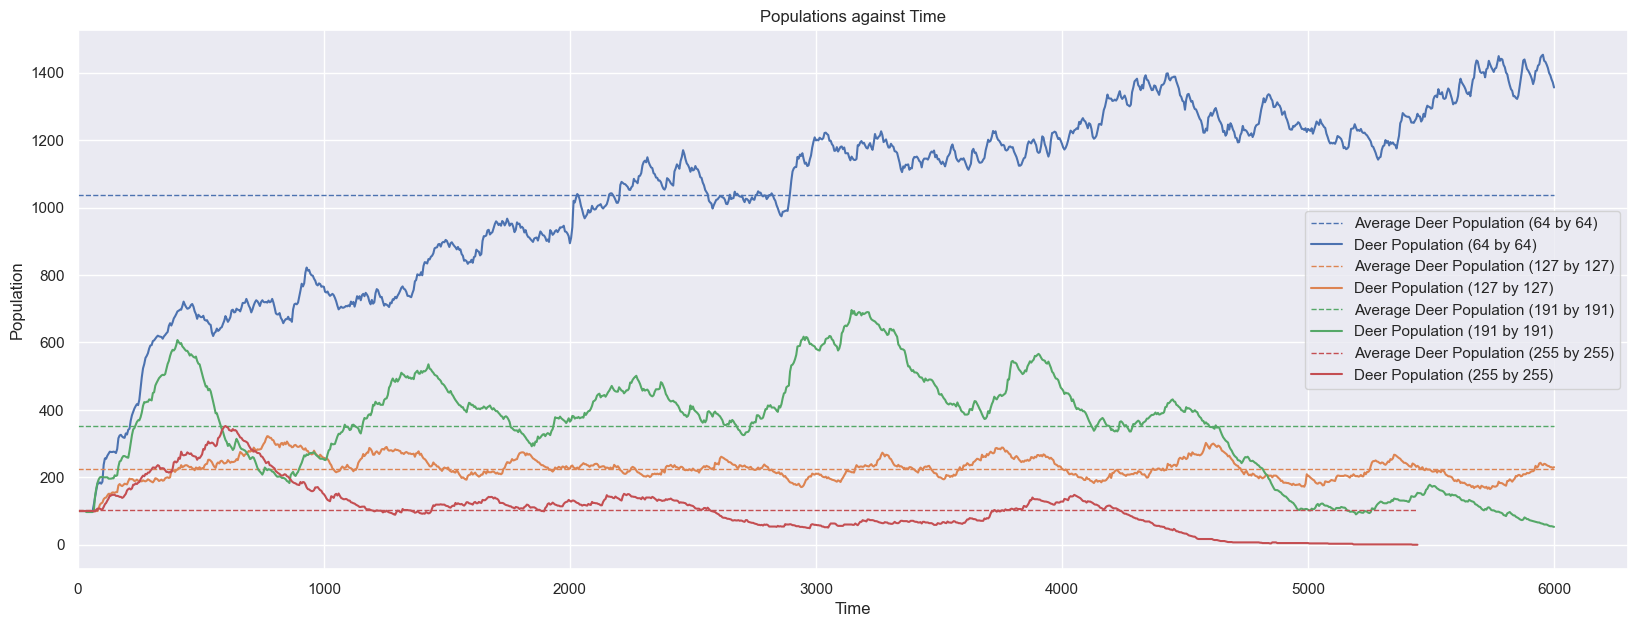

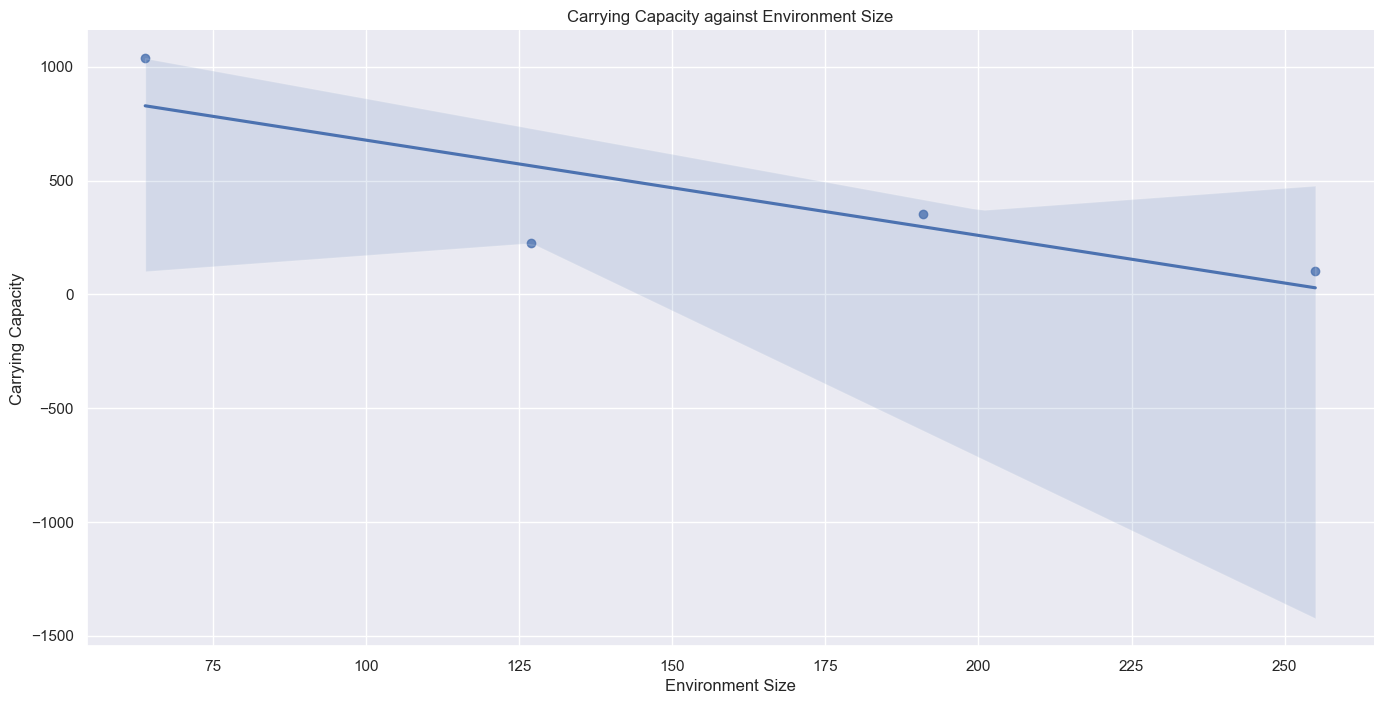

In [15]:
plt.figure(figsize=(20, 7))
plt.title("Populations against Time")

for i, (environment_size, df) in enumerate(zip([64, 127, 191, 255], all_dfs)):
    data_count = max(df[df["species"] == "Deer"]["time"])
    # environment_size = df.iloc[0]["environment_size"]
    column_average = np.average(df[df["species"] == "Deer"]["population"])

    print(f"Average deer population ({environment_size}): {column_average}")
    plt.plot([0, data_count], [column_average, column_average], linewidth=1, label=f"Average Deer Population ({environment_size} by {environment_size})", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="population", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Population ({environment_size} by {environment_size})")

g.set_xlabel("Time")
g.set_ylabel("Population")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_size, x="environment_size", y="average_population", height=7, aspect=2)
plt.gca().set_title("Carrying Capacity against Environment Size")
g.set(ylabel="Carrying Capacity", xlabel="Environment Size")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_size["environment_size"], df_by_size["average_population"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deer speed (64): 0.5487406167500001
Average deer speed (127): 1.1003965396666668
Average deer speed (191): 0.8912370737500002
Average deer speed (255): 0.9536665755739211

R = 0.5527599002084885
Std_err: 0.001673761519311435


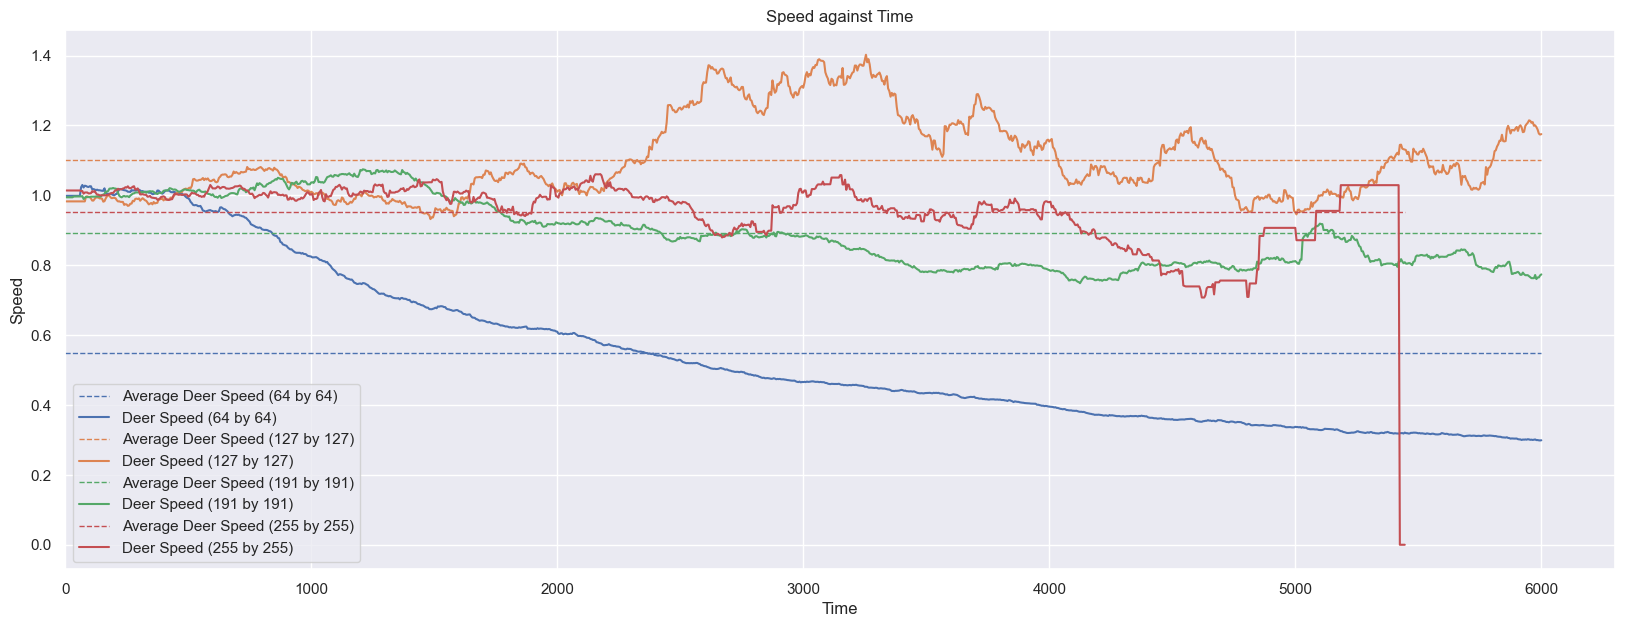

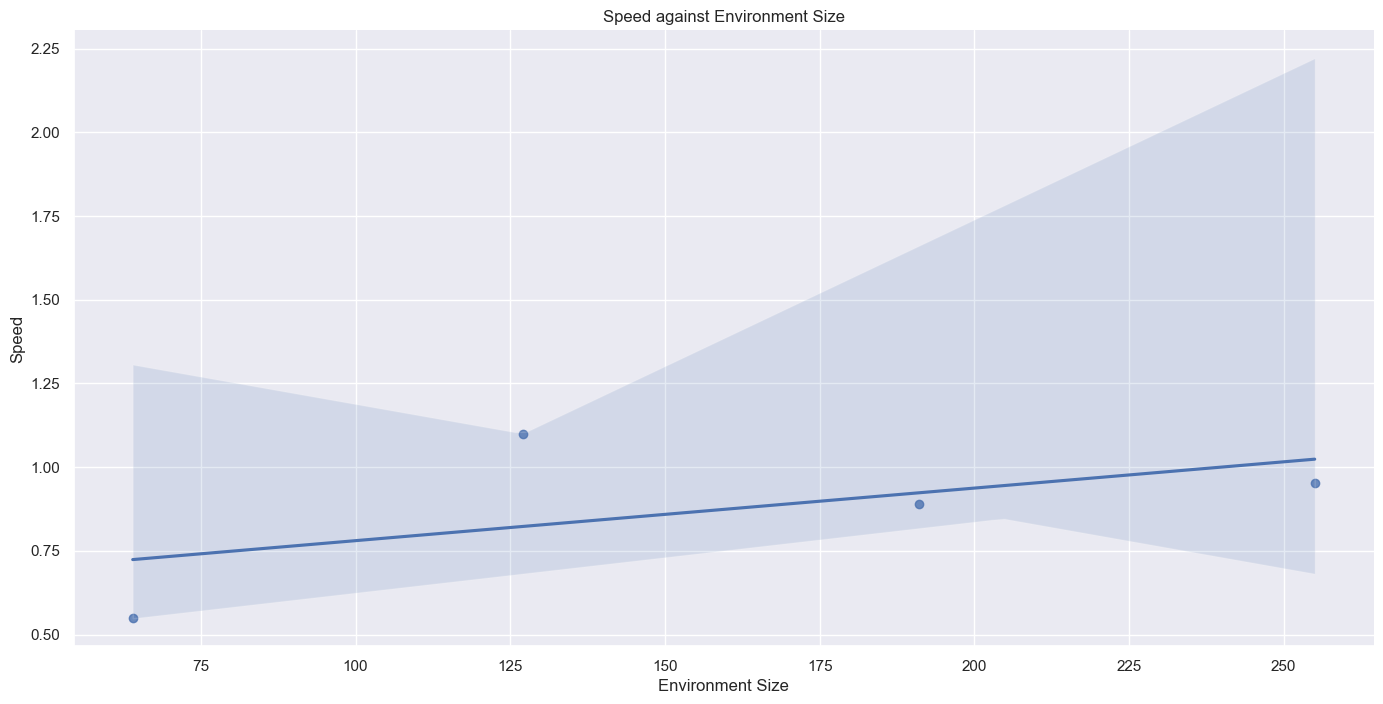

In [17]:
plt.figure(figsize=(20, 7))
plt.title("Speed against Time")

for i, (environment_size, df) in enumerate(zip([64, 127, 191, 255], all_dfs)):
    data_count = max(df[df["species"] == "Deer"]["time"])
    # environment_size = df.iloc[0]["environment_size"]
    column_average = np.average(df[df["species"] == "Deer"]["speed"])

    print(f"Average deer speed ({environment_size}): {column_average}")
    plt.plot([0, data_count], [column_average, column_average], linewidth=1, label=f"Average Deer Speed ({environment_size} by {environment_size})", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="speed", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Speed ({environment_size} by {environment_size})")

g.set_xlabel("Time")
g.set_ylabel("Speed")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_size, x="environment_size", y="average_speed", height=7, aspect=2)
plt.gca().set_title("Speed against Environment Size")
g.set(ylabel="Speed", xlabel="Environment Size")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_size["environment_size"], df_by_size["average_speed"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deer size (64): 1.5832766255833333
Average deer size (127): 1.5115101691666666
Average deer size (191): 1.3976526149166666
Average deer size (255): 1.4759019944903582

R = -0.7278607080942254
Std_err: 0.0004550942978299787


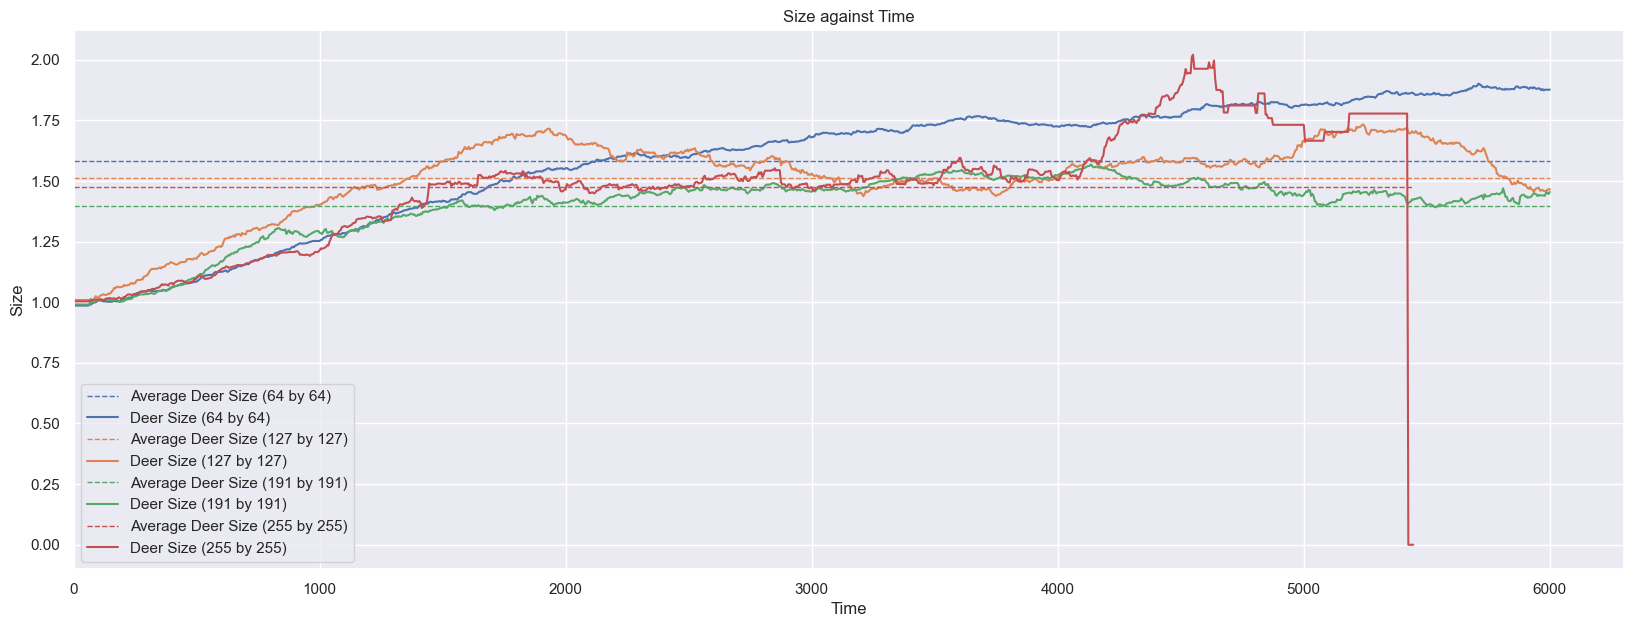

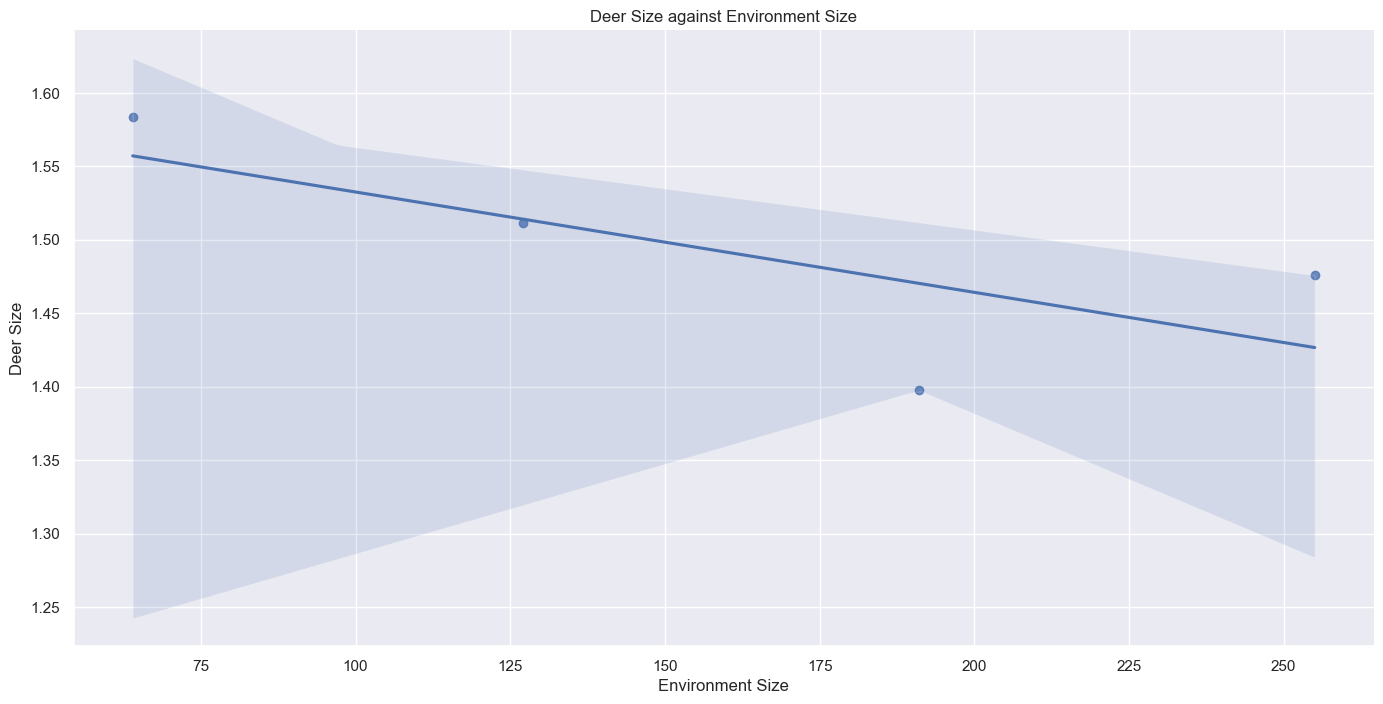

In [18]:
plt.figure(figsize=(20, 7))
plt.title("Size against Time")

for i, (environment_size, df) in enumerate(zip([64, 127, 191, 255], all_dfs)):
    data_count = max(df[df["species"] == "Deer"]["time"])
    # environment_size = df.iloc[0]["environment_size"]
    column_average = np.average(df[df["species"] == "Deer"]["size"])

    print(f"Average deer size ({environment_size}): {column_average}")
    plt.plot([0, data_count], [column_average, column_average], linewidth=1, label=f"Average Deer Size ({environment_size} by {environment_size})", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="size", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Size ({environment_size} by {environment_size})")

g.set_xlabel("Time")
g.set_ylabel("Size")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_size, x="environment_size", y="average_size", height=7, aspect=2)
plt.gca().set_title("Deer Size against Environment Size")
g.set(ylabel="Deer Size", xlabel="Environment Size")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_size["environment_size"], df_by_size["average_size"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deaths by hunger (64 by 64): 0.385
Average deaths by hunger (127 by 127): 1.0258333333333334
Average deaths by hunger (191 by 191): 1.565
Average deaths by hunger (255 by 255): 0.5114784205693297

R = 0.21745694595863677
Std_err: 0.004522326521184267


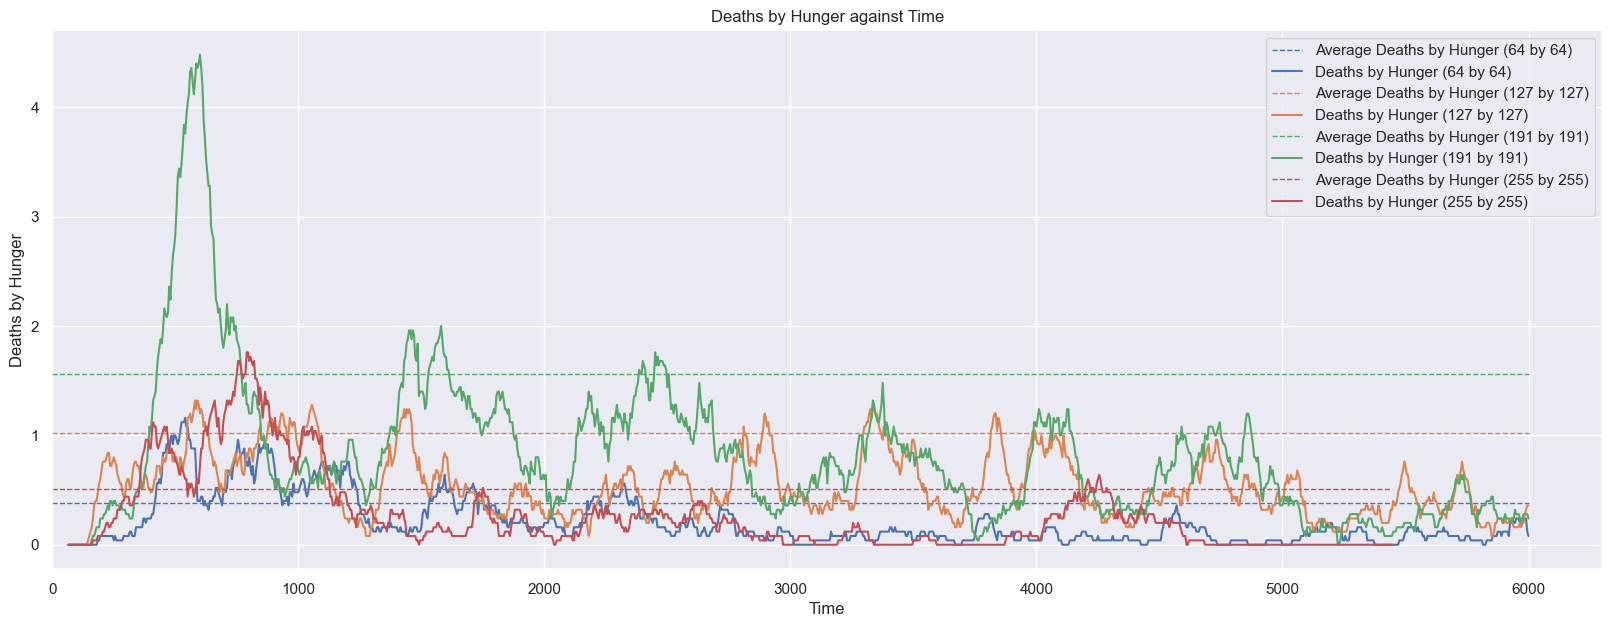

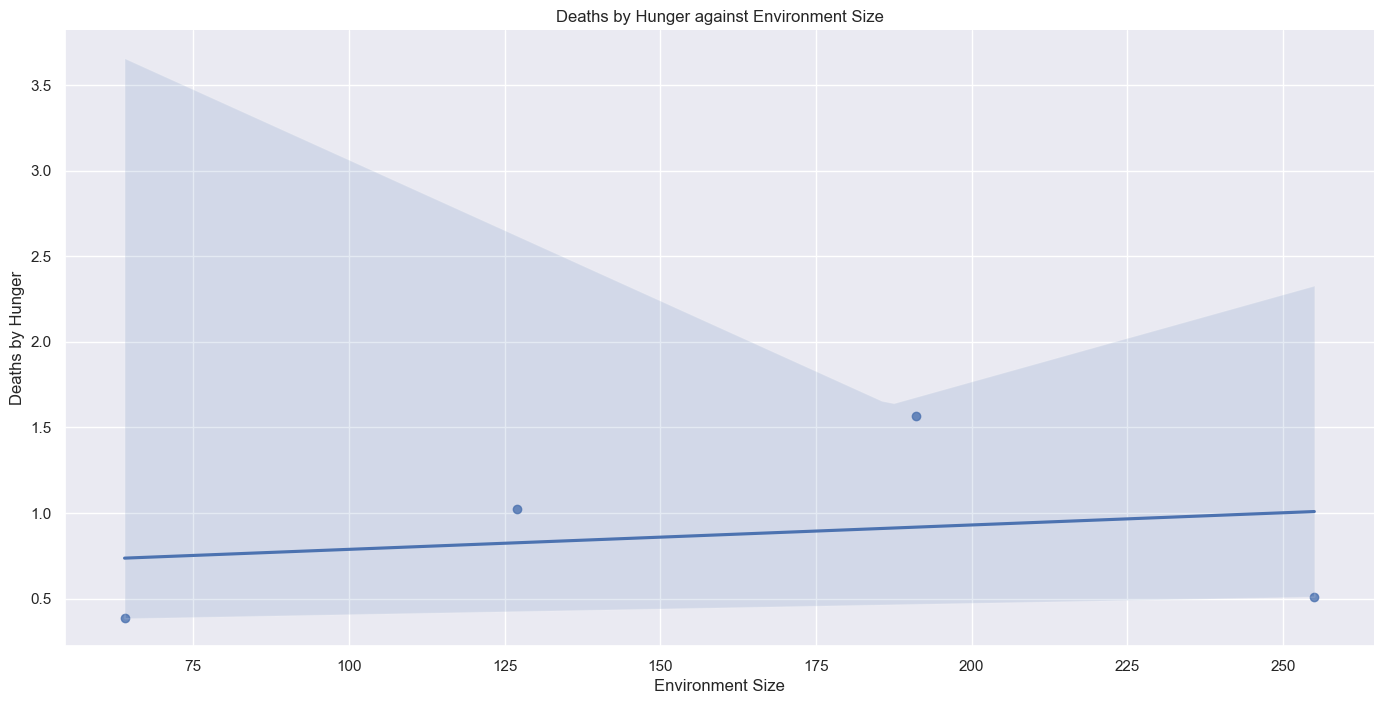

In [22]:
plt.figure(figsize=(20, 7))
plt.title("Deaths by Hunger against Time")

for i, (environment_size, df) in enumerate(zip([64, 127, 191, 255], all_dfs)):
    data_count = max(df[df["species"] == "Deer"]["time"])
    
    average_deaths_over_time = np.average(df[df["species"] == "Deer"]["deathsByHunger"])
    print(f"Average deaths by hunger ({environment_size} by {environment_size}): {average_deaths_over_time}")
    plt.plot([0, data_count], [average_deaths_over_time, average_deaths_over_time], linewidth=1, label=f"Average Deaths by Hunger ({environment_size} by {environment_size})", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="deathsByHungerSmoothed", color=sns.color_palette()[i], linewidth=1.5, label=f"Deaths by Hunger ({environment_size} by {environment_size})")

g.set_xlabel("Time")
g.set_ylabel("Deaths by Hunger")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_size, x="environment_size", y="average_deathsByHunger", height=7, aspect=2)
plt.gca().set_title("Deaths by Hunger against Environment Size")
g.set(ylabel="Deaths by Hunger", xlabel="Environment Size")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_size["environment_size"], df_by_size["average_deathsByHunger"])
print(f"R = {r_value}\nStd_err: {std_err}")